Problem Statement:Implement a Exploratory Data Analysis on train data and also also Write your observations as you explore as conclusions.

Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

1. Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Load the dataset in pandas dataframe —

In [2]:
data = pd.read_csv('haberman.csv', header = 0)

In [3]:
data.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

2. Understanding data

Getting the information of each attribute

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
data["survival_status"].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

1.The dataset is imbalanced as expected.
2.Out of a total of 305 patients, the number of patients who survived
over 5 years post-operation is nearly 3 times the number of patients who died within 5 years.





2.1 Data preparation


Before we go for statistical analysis and visualization, we see that the original class labels — 1 (survived 5 years and above) and 2 (died within 5 years) are not in accordance with the case.

So, we map survival status values 1 and 2 in the column survival_status to categorical variables ‘yes’ and ‘no’ respectively such that,
survival_status = 1 → survival_status = ‘yes’
survival_status = 2 → survival_status = ‘no’







In [6]:
data['survival_status'] = data['survival_status'].map({1:"yes", 2:"no"})

2.2 General statistical analysis

In [7]:
data.describe()

,patient_age,operation_year,positive_axillary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


1.On average, patients got operated at age of 63.

2.An average number of positive axillary nodes detected = 4.

3.As indicated by the 50th percentile, the median of positive axillary nodes is 1.

4.As indicated by the 75th percentile, 75% of the patients have less than 4 nodes detected.




2.3 Class-wise statistical analysis

In [8]:
survival_yes = data[data['survival_status'] == 'yes']
survival_yes.describe()

,patient_age,operation_year,positive_axillary_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [9]:
survival_no = data[data["survival_status"] == "no"]
survival_no.describe()

,patient_age,operation_year,positive_axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


From the above class-wise analysis, it can be observed that —


1.The average age at which the patient is operated on is nearly the same in both cases.

2.Patients who died within 5 years on average had about 4 to 5 positive axillary nodes more than the patients who lived over 5 years post-operation.


3. Uni-variate data analysis

Uni-variate analysis as the name suggests is an analysis carried out by considering one variable at a time.

To determine the survival status given the features — patient's age, operation year, and positive axillary nodes count.

The distribution plots (also called probability density function or PDF plots) with each feature as a variable on X-axis. The values on the Y-axis in each case represent the normalized density.

1. Patient’s age

c:\Users\UMAP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


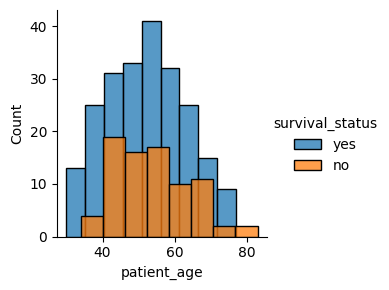

In [10]:
sns.FacetGrid(data, hue = "survival_status").map(sns.histplot, "patient_age").add_legend()
plt.show()

Conclusion:

1.Among all the age groups, the patients belonging to 40-60 years of age are highest.

2.There is a high overlap between the class labels. This implies that the survival status of the patient post-operation cannot be discerned from the patient's age.

2. Operation year

c:\Users\UMAP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


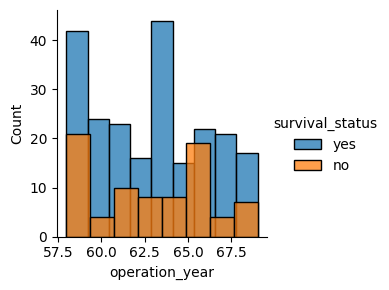

In [11]:
sns.FacetGrid(data, hue = "survival_status").map(sns.histplot, "operation_year").add_legend()
plt.show()

Conclusion:

Just like the above plot, here too, there is a huge overlap between the class labels suggesting that one cannot make any distinctive conclusion regarding the survival status based solely on the operation year.

3. Number of positive axillary nodes

c:\Users\UMAP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


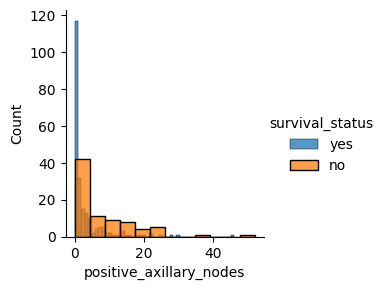

In [12]:
sns.FacetGrid(data, hue = "survival_status").map(sns.histplot, "positive_axillary_nodes").add_legend()
plt.show()

This plot looks interesting! Although there is a good amount of overlap, here we can make some distinctive observations –


1.Patients having 4 or fewer axillary nodes — A very good majority of these patients have survived 5 years or longer.

2.Patients having more than 4 axillary nodes — the likelihood of survival is found to be less as compared to the patients having 4 or fewer axillary nodes.

Cumulative Distribution function(CDF) plots come into the picture for the quantitative measure.

CDF is an integral of PDF over the range of values that a continuous random variable takes. CDF of a random variable at any point 'x' gives the probability that a random variable will take a value less than or equal to 'x'.

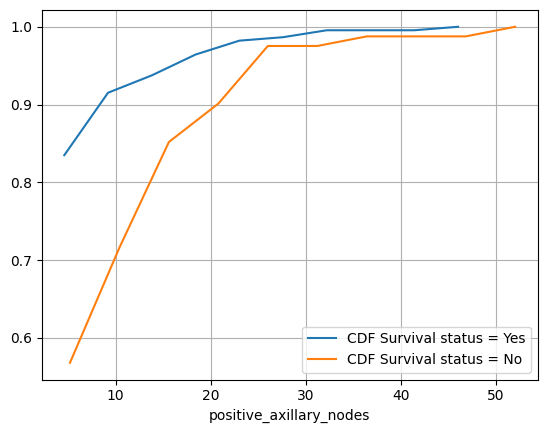

In [13]:
counts, bin_edges = np.histogram(survival_yes["positive_axillary_nodes"], density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = "CDF Survival status = Yes")

counts, bin_edges = np.histogram(survival_no["positive_axillary_nodes"], density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = "CDF Survival status = No")
plt.legend()
plt.xlabel("positive_axillary_nodes")
plt.grid()
plt.show()

Some of the observations that could be made from the CDF plot —


1.Patients having 4 or fewer positive axillary nodes have about 85% chance of survival for 5 years or longer post-operation, whereas this number is less for the patients having more than 4 positive axillary nodes. This gap diminishes as the number of axillary nodes increases.